In [4]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import textstat
import os

In [1]:
'''base = '/Users/carina/Downloads/courses/final thesis/precessed data/ex3/resultvolume/'
for root, ds, fs in os.walk(base):
        for f in fs:
            if 'BERT' in f:
                print('BERT:')
                fullpath = os.path.join(root, f)
                df = pd.read_csv(fullpath)
                df = df.drop(df.columns[0],axis=1)
                heads = df.columns.values.tolist()
                
                category = f.split('.')[0].split('_')[-1]
                print(category)
                
                for head in heads:
                    print(head)
                    tem = df[head].tolist()
                    po = sum(i>0 for i in tem) / 480
                    nt = 1-po
                    print('po')
                    print(po)
                    print('nt')
                    print(nt)'''
                


"base = '/Users/carina/Downloads/courses/final thesis/precessed data/ex3/resultvolume/'\nfor root, ds, fs in os.walk(base):\n        for f in fs:\n            if 'BERT' in f:\n                print('BERT:')\n                fullpath = os.path.join(root, f)\n                df = pd.read_csv(fullpath)\n                df = df.drop(df.columns[0],axis=1)\n                heads = df.columns.values.tolist()\n                \n                category = f.split('.')[0].split('_')[-1]\n                print(category)\n                \n                for head in heads:\n                    print(head)\n                    tem = df[head].tolist()\n                    po = sum(i>0 for i in tem) / 480\n                    nt = 1-po\n                    print('po')\n                    print(po)\n                    print('nt')\n                    print(nt)"

In [2]:
'''df = pd.read_csv('/Users/carina/Downloads/courses/final thesis/precessed data/ex3/resultvolume/percentage of volumeresult.csv')
df

f, axes = plt.subplots(2, 1,sharex=True, figsize=(5,4))

orders = ['TFIDF5','YAKE5','TFIDF10','YAKE10','TFIDF15','YAKE15','allwords']
#my_pal = {"BERT": "g", "GPT2": "b"}
df_GPT2 = df[df['LM'] == 'GPT2']
df_BERT = df[df['LM'] == 'BERT']
a = sns.boxplot(y="Positive",x= "WATs",hue="Category", hue_order=orders,data=df_GPT2,ax=axes[0])
a.legend (bbox_to_anchor = (1.1, 1))
b = sns.boxplot(y="Positive",x= "WATs",hue="Category", hue_order=orders,data=df_BERT,ax=axes[1])
b.legend (bbox_to_anchor = (1.1, 1))'''

'df = pd.read_csv(\'/Users/carina/Downloads/courses/final thesis/precessed data/ex3/resultvolume/percentage of volumeresult.csv\')\ndf\n\nf, axes = plt.subplots(2, 1,sharex=True, figsize=(5,4))\n\norders = [\'TFIDF5\',\'YAKE5\',\'TFIDF10\',\'YAKE10\',\'TFIDF15\',\'YAKE15\',\'allwords\']\n#my_pal = {"BERT": "g", "GPT2": "b"}\ndf_GPT2 = df[df[\'LM\'] == \'GPT2\']\ndf_BERT = df[df[\'LM\'] == \'BERT\']\na = sns.boxplot(y="Positive",x= "WATs",hue="Category", hue_order=orders,data=df_GPT2,ax=axes[0])\na.legend (bbox_to_anchor = (1.1, 1))\nb = sns.boxplot(y="Positive",x= "WATs",hue="Category", hue_order=orders,data=df_BERT,ax=axes[1])\nb.legend (bbox_to_anchor = (1.1, 1))'

In [25]:
base = '/Users/carina/Downloads/courses/final thesis/precessed data/ex3/resultvolume/'

overall_value_GPT2 = pd.DataFrame()
overall_value_BERT = pd.DataFrame()

overall_value_value_BERT = []
overall_value_tool_BERT = []
overall_value_category_BERT = []
overall_value_value_GPT2 = []
overall_value_tool_GPT2 = []
overall_value_category_GPT2 = []
for root, ds, fs in os.walk(base):
        for f in fs:
            if 'GPT2' in f:
                fullpath = os.path.join(root, f)
                df = pd.read_csv(fullpath)
                df = df.drop(df.columns[0],axis=1)
                WATs = ['Rephrase','Grammarly','ChatGPT','Wordtune','Quillbot']
                df.columns = WATs
                heads = df.columns.values.tolist()
                
                category = f.split('.')[0].split('_')[-1]
            
                for head in heads:
                    tem = df[head].tolist()
                    for item in tem:
                        overall_value_value_GPT2.append(item*2)
                        overall_value_tool_GPT2.append(head)
                        overall_value_category_GPT2.append(category)
                    
            if 'BERT' in f:
                fullpath = os.path.join(root, f)
                df = pd.read_csv(fullpath)
                df = df.drop(df.columns[0],axis=1)
                WATs = ['Rephrase','Grammarly','ChatGPT','Wordtune','Quillbot']
                df.columns = WATs
                heads = df.columns.values.tolist()
                
                category = f.split('.')[0].split('_')[-1]
                for head in heads:
                    tem = df[head].tolist()
                    for item in tem:
                        overall_value_value_BERT.append(item*2)
                        overall_value_tool_BERT.append(head)
                        overall_value_category_BERT.append(category)
#overall_value_value_GPT2 = overall_value_value_GPT2 / 10000                       
overall_value_GPT2['volume_GPT2'] = overall_value_value_GPT2
overall_value_GPT2['WATs'] = overall_value_tool_GPT2
overall_value_GPT2['category'] = overall_value_category_GPT2

#overall_value_value_BERT = overall_value_value_BERT / 10000
overall_value_BERT['volume_BERT'] = overall_value_value_BERT
overall_value_BERT['WATs'] = overall_value_tool_BERT
overall_value_BERT['category'] = overall_value_category_BERT

'\nb = sns.boxplot(y="volume_BERT",x= "WATs",hue="category", hue_order=orders,data=overall_value_BERT)\n\nb.legend (bbox_to_anchor = (1.1, 1),fontsize=\'x-large\')\n\nplt.xlabel("", fontdict={\'family\' : \'Times New Roman\', \'size\'   : 320})\nplt.ylabel("Volume_BERT", fontdict={\'family\' : \'Times New Roman\', \'size\'   : 32})\nplt.yticks(fontproperties = \'Times New Roman\', size = 35)\nplt.xticks(fontproperties = \'Times New Roman\', size = 30)\nplt.savefig(\'/Users/carina/Downloads/courses/final thesis/figures of results/word/volume/convex hull volume BERT.pdf\', format = \'pdf\',dpi = 500,bbox_inches=\'tight\')\n\n'

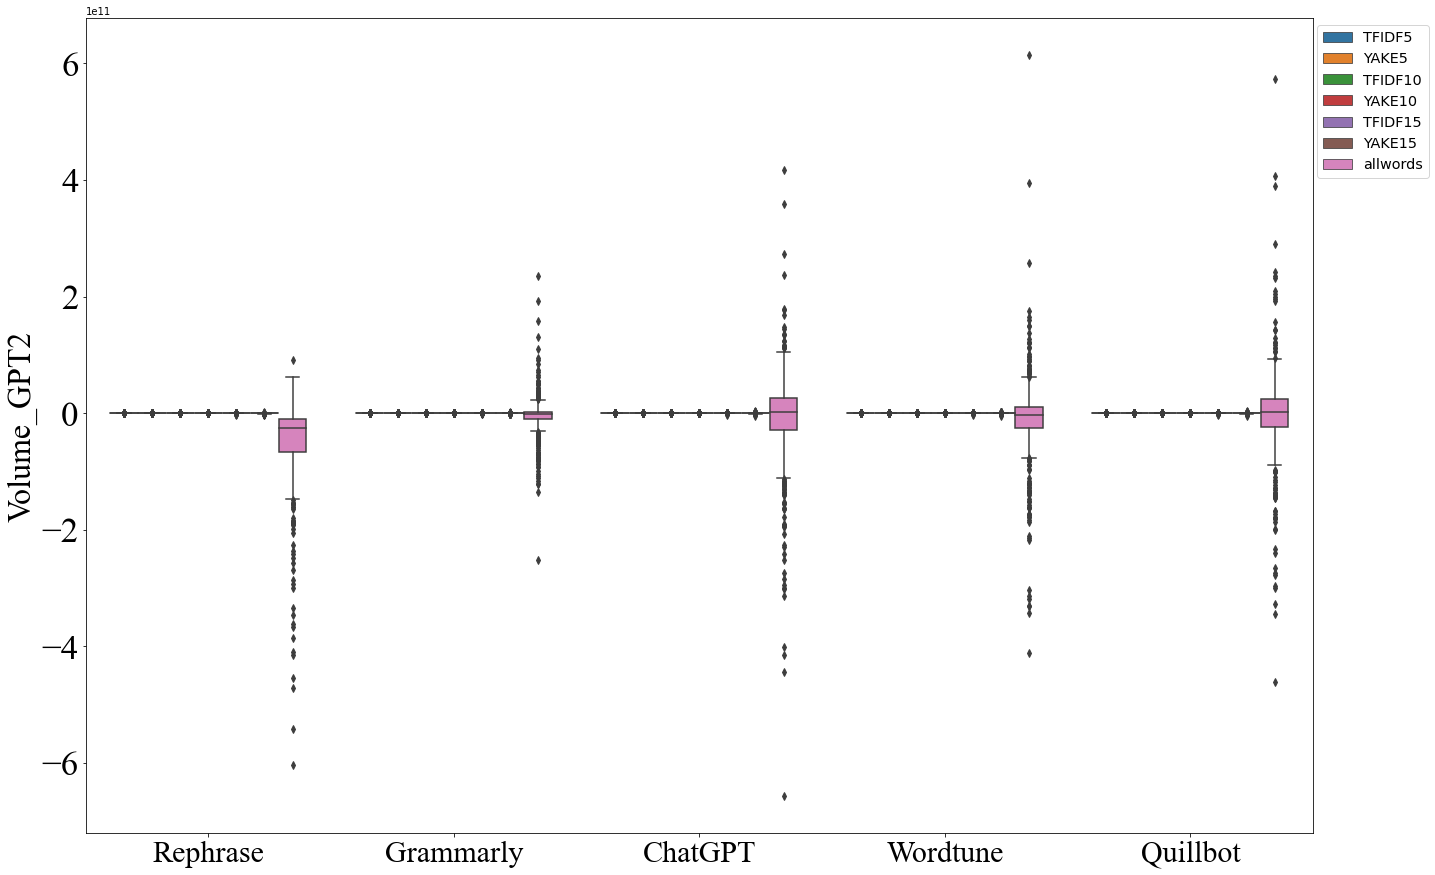

In [33]:
f, axes = plt.subplots(1, 1,sharex=False, figsize=(22,15))

orders = ['TFIDF5','YAKE5','TFIDF10','YAKE10','TFIDF15','YAKE15','allwords']
#my_pal = {"BERT": "g", "GPT2": "b"}

a = sns.boxplot(y="volume_GPT2",x= "WATs",hue="category", hue_order=orders,data=overall_value_GPT2)
a.legend (bbox_to_anchor = (1.1, 1),fontsize='x-large')

plt.xlabel("", fontdict={'family' : 'Times New Roman', 'size'   : 320})
plt.ylabel("Volume_GPT2", fontdict={'family' : 'Times New Roman', 'size'   : 32})
plt.yticks(fontproperties = 'Times New Roman', size = 35)
plt.xticks(fontproperties = 'Times New Roman', size = 30)
plt.savefig('/Users/carina/Downloads/courses/final thesis/figures of results/word/volume/convex hull volume GPT2.pdf', format = 'pdf',dpi = 500,bbox_inches='tight')

'''
b = sns.boxplot(y="volume_BERT",x= "WATs",hue="category", hue_order=orders,data=overall_value_BERT)

b.legend (bbox_to_anchor = (1.1, 1),fontsize='x-large')

plt.xlabel("", fontdict={'family' : 'Times New Roman', 'size'   : 320})
plt.ylabel("Volume_BERT", fontdict={'family' : 'Times New Roman', 'size'   : 32})
plt.yticks(fontproperties = 'Times New Roman', size = 35)
plt.xticks(fontproperties = 'Times New Roman', size = 30)
plt.savefig('/Users/carina/Downloads/courses/final thesis/figures of results/word/volume/convex hull volume BERT.pdf', format = 'pdf',dpi = 500,bbox_inches='tight')

'''

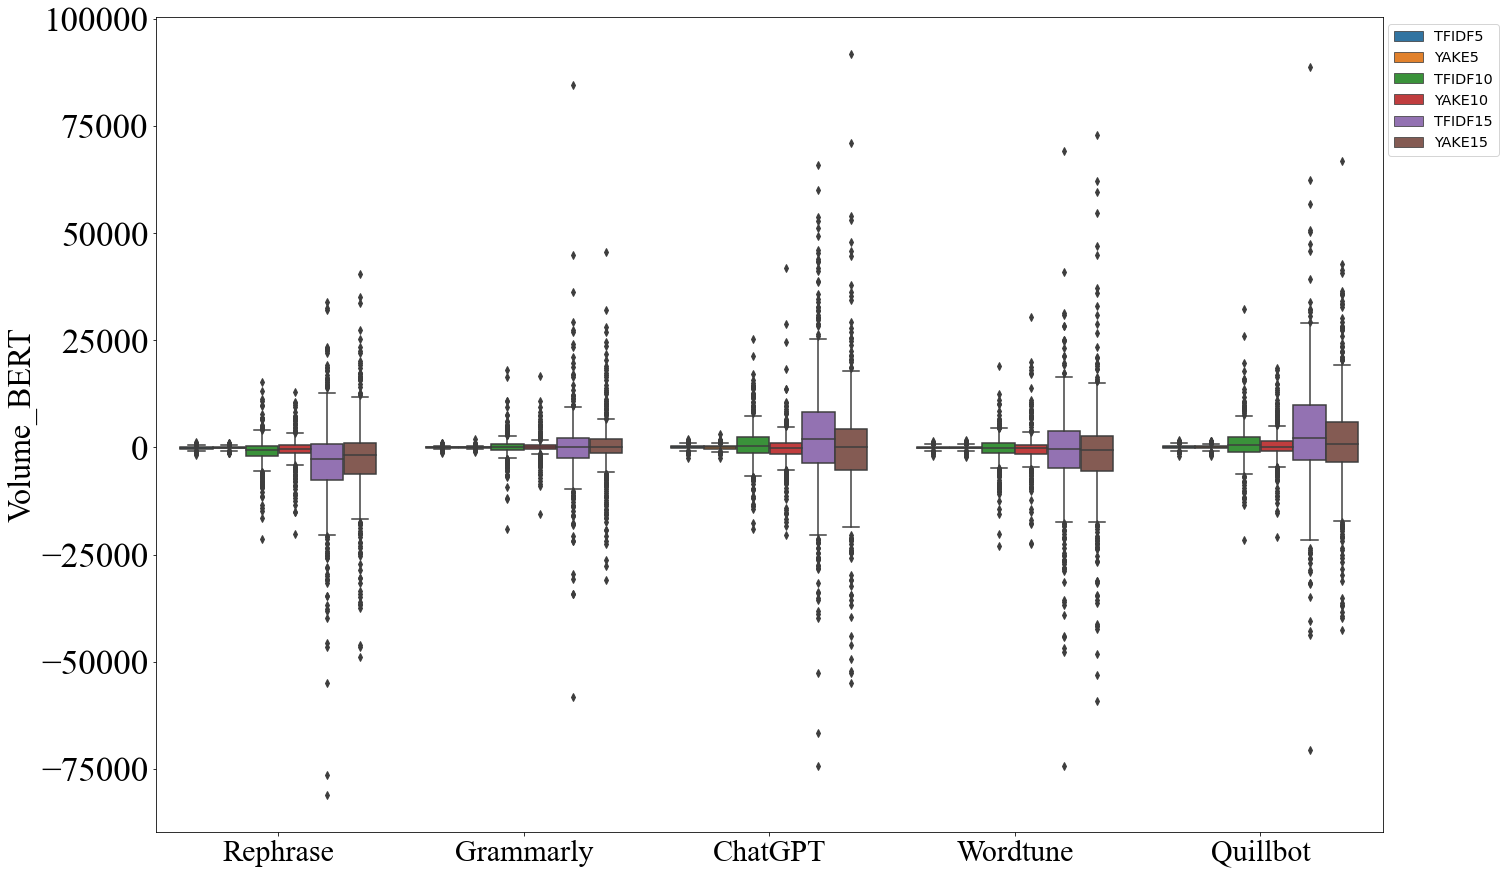

In [27]:
f, axes = plt.subplots(1, 1,sharex=False, figsize=(22,15))

orders = ['TFIDF5','YAKE5','TFIDF10','YAKE10','TFIDF15','YAKE15']
#my_pal = {"BERT": "g", "GPT2": "b"}
'''
a = sns.boxplot(y="volume_GPT2",x= "WATs",hue="category", hue_order=orders,data=overall_value_GPT2)
a.legend (bbox_to_anchor = (1.1, 1),fontsize='x-large')

plt.xlabel("", fontdict={'family' : 'Times New Roman', 'size'   : 320})
plt.ylabel("Volume_GPT2", fontdict={'family' : 'Times New Roman', 'size'   : 32})
plt.yticks(fontproperties = 'Times New Roman', size = 42)
plt.xticks(fontproperties = 'Times New Roman', size = 30)
plt.savefig('/Users/carina/Downloads/courses/final thesis/figures of results/word/volume/convex hull volume GPT2.pdf', format = 'pdf',dpi = 500,bbox_inches='tight')

'''
b = sns.boxplot(y="volume_BERT",x= "WATs",hue="category", hue_order=orders,data=overall_value_BERT)
b.legend (bbox_to_anchor = (1.1, 1),fontsize='x-large')

plt.xlabel("", fontdict={'family' : 'Times New Roman', 'size'   : 320})
plt.ylabel("Volume_BERT", fontdict={'family' : 'Times New Roman', 'size'   : 32})
plt.yticks(fontproperties = 'Times New Roman', size = 35)
plt.xticks(fontproperties = 'Times New Roman', size = 30)
plt.savefig('/Users/carina/Downloads/courses/final thesis/figures of results/word/volume/convex hull volume BERT-keywords.pdf', format = 'pdf',dpi = 500,bbox_inches='tight')
